# Survival Multiarmed Bandits

## Comparing several algorithms through numerical experiments on the MAGB setting

The survival setting includes a budget $b$. From an initial budget $b_0$, the budget evolves with received rewards.

## Import dependencies:

In [1]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm
import pickle

#current date
date = datetime.now().strftime("%Y_%m_%d")

#save pickle
save_pickle = False

In [2]:
#Configure path for local packages
import setup

from magb_arms import RandomArm, BernoulliArm, GaussianArm, TruncGaussianArm
from magb_policies import FixedPolicy, GreedyPolicy, RandomPolicy, EpsilonGreedyPolicy, EmpiricalSumPolicy, SoftMaxPolicy, AlphaUCBPolicy, UCB1Policy, ThompsonPolicy, ExploreThenExploitPolicy, SequentialPolicy
from magb_simulator import SMAB

## Setting (k-Gaussian-Arms)

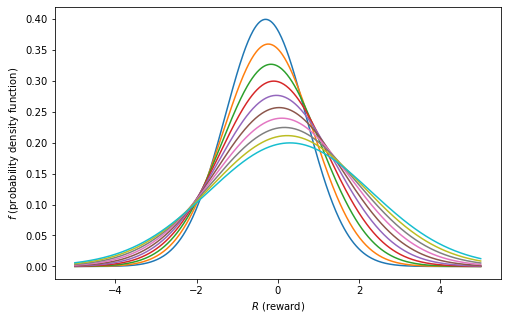

In [3]:
#number of arms and corresponding parameters
k = 10
mean_arr = np.linspace(-0.3, 0.3, k)
stddev_arr = np.linspace(1.0, 2.0, k)

#GAUSSIAN
arms = [GaussianArm(mean, stddev) for mean, stddev in zip(mean_arr, stddev_arr)]

#initial budget
b_0 = k #15
omega = k 

#each arm must be tried at least w times at beginning
w=1

plt.rcParams['figure.figsize'] = (8, 5)

x = np.linspace(-5, +5, 500)
for i, arm in enumerate(arms):
    plt.plot(x, norm.pdf(x, arm.mean, arm.stddev))
plt.xlabel('$R$ (reward)')
plt.ylabel('$f$ (probability density function)')
plt.show()


## Simulation Gaussian : naive methods over short-horizon 

 - Several Repetitions 
 - Short Horizon

In [4]:

#algorithms
algs = [
     FixedPolicy(k, w=w, fixed_i=1, label="Worst Arm"),
     FixedPolicy(k, w=w, fixed_i=k, label="Best Arm"),
     FixedPolicy(k, w=w, fixed_i=((k+1)//2)+1, label="Worst Positive Arm"),
     FixedPolicy(k, w=w, fixed_i=((k-1)//2)+1, label="Best Negative Arm"),
     RandomPolicy(k, w=w),
     SequentialPolicy(k),
     GreedyPolicy(k, w=w),
     EmpiricalSumPolicy(k, w=w)
    ]

In [5]:
#time-horizon
h = 150

#repetitions
n = 100

sim_gaussian_short_naive = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim_gaussian_short_naive.run(tqdm_leave=True)


  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
if save_pickle:
    with open('sim_gaussian_short_naive.pickle', 'wb') as handle:
        pickle.dump(sim_gaussian_short_naive, handle, protocol=pickle.HIGHEST_PROTOCOL)

#with open('filename.pickle', 'rb') as handle:
#    b = pickle.load(handle)

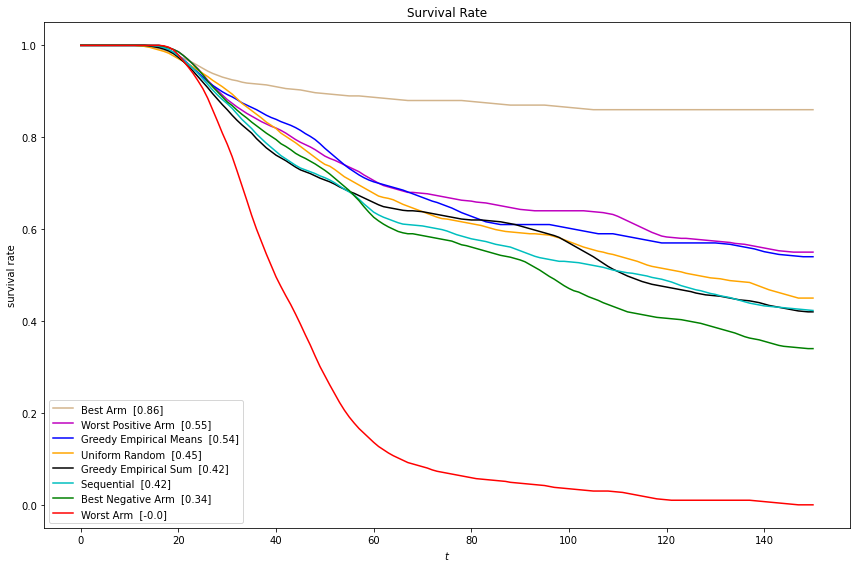

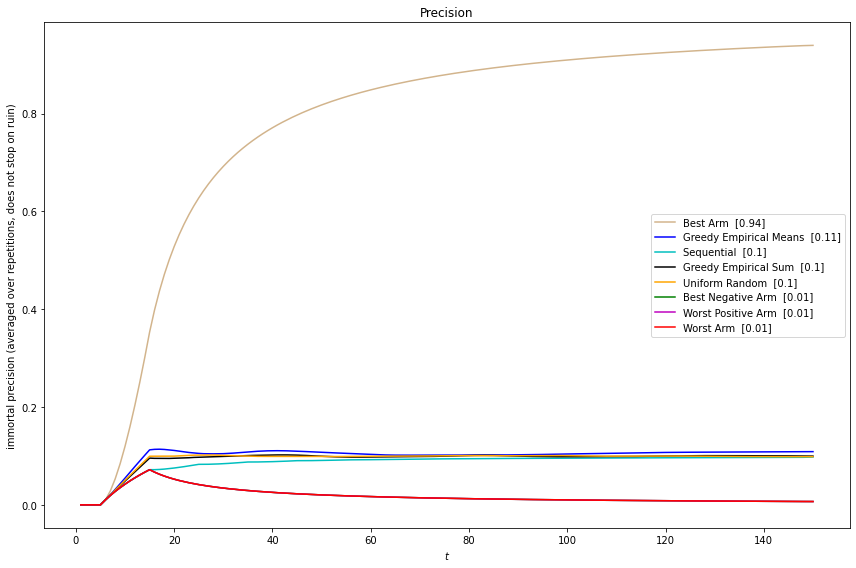

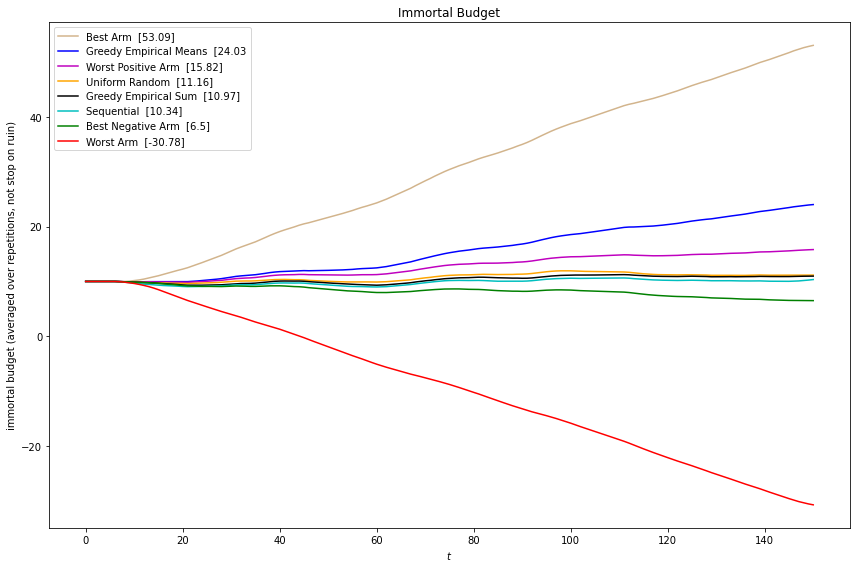

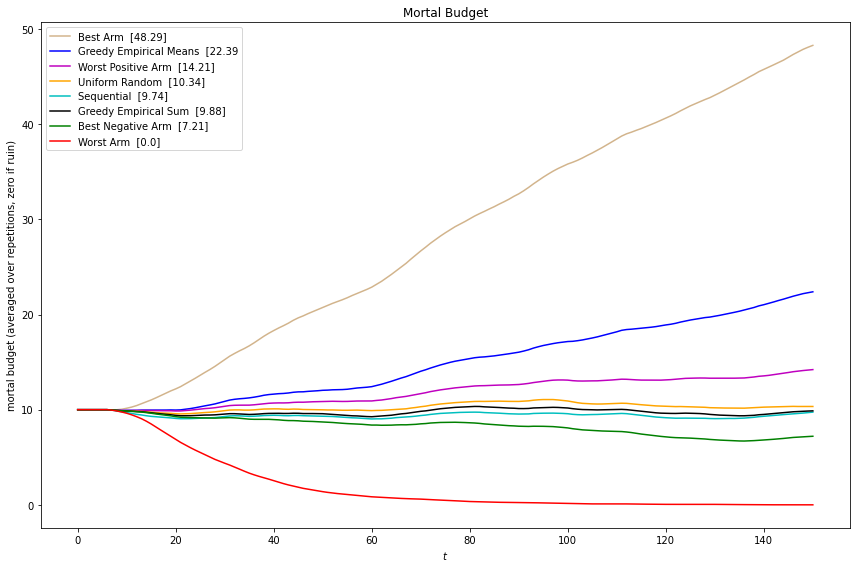

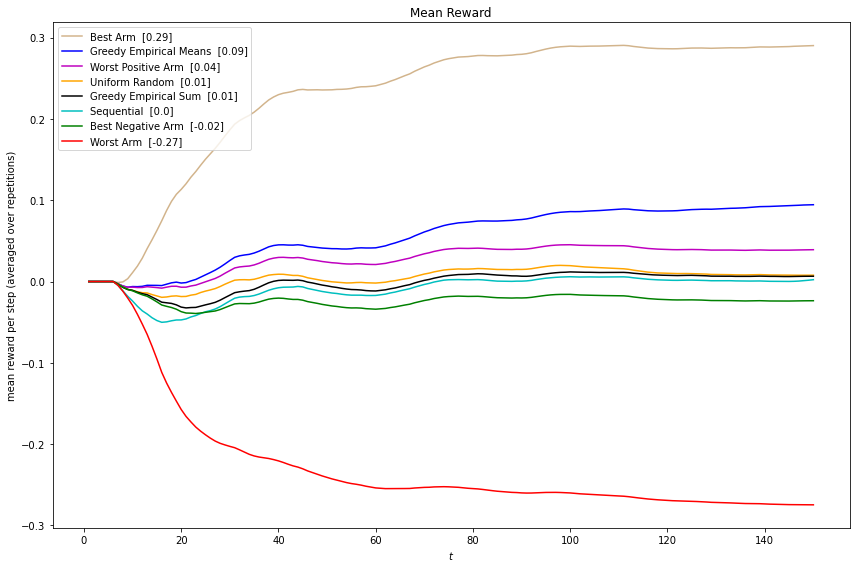

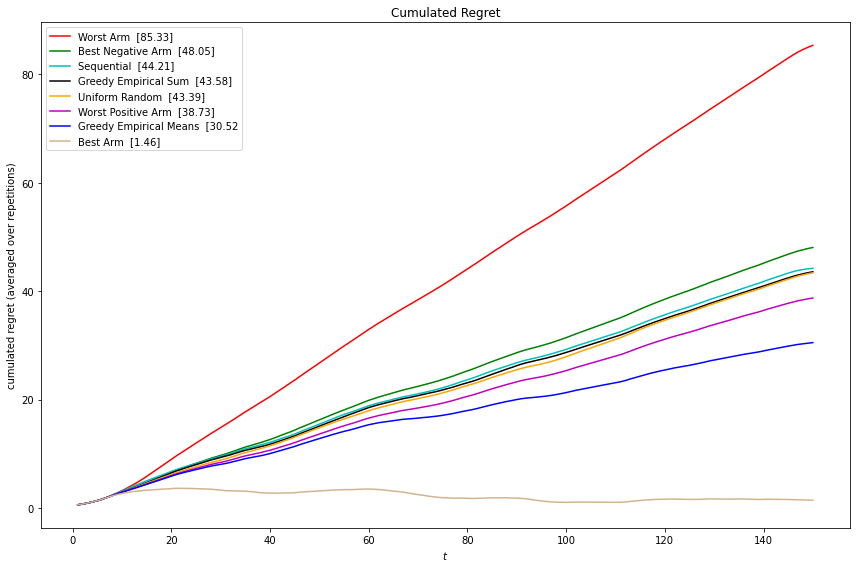

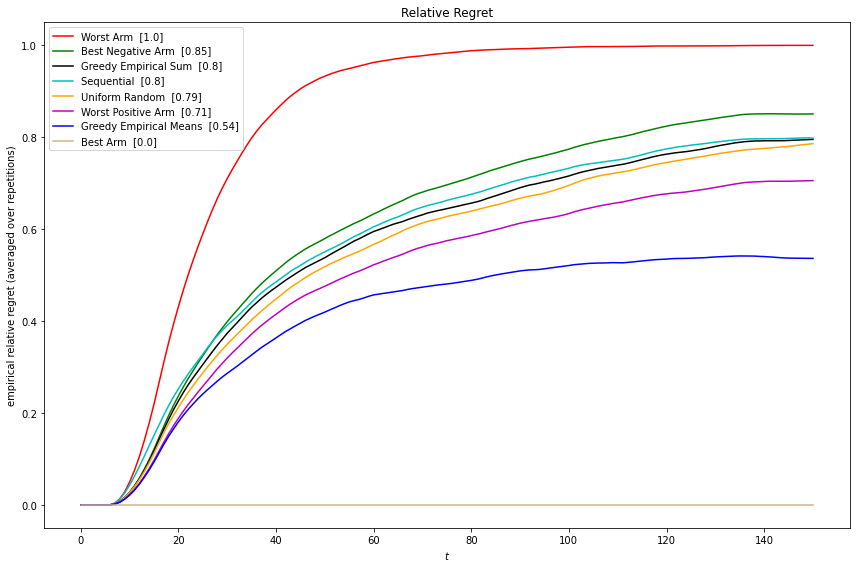

In [7]:
colors = ['r', 'tan', 'm', 'g', 'orange', 'c',  'b', 'k',  'y', 'darkgrey', 'darkblue', 'darkgreen']
styles = ['-',               '--',                '-',      '--', '-',     '--',       '-',           '--',           '-',                 ':', '-.', ':', '-']
figsize=(12,8)
smooth_window = sim_gaussian_short_naive.k

sim_gaussian_short_naive.plot('survival', filename='survival.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_naive.plot('precision', filename='precision.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_naive.plot('immortal_budget', filename='immortal_budget.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_naive.plot('mortal_budget', filename='mortal_budget.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_naive.plot('avg_reward', filename='avg_reward.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_naive.plot('sum_regret', filename='sum_regret.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_naive.plot('rel_regret', filename='rel_regret.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)


In [10]:
#algorithms
algs = [
     FixedPolicy(k, w=w, fixed_i=1, label="Worst Arm"),
     FixedPolicy(k, w=w, fixed_i=k, label="Best Arm"),
     FixedPolicy(k, w=w, fixed_i=((k+1)//2)+1, label="Worst Positive Arm"),
     FixedPolicy(k, w=w, fixed_i=((k-1)//2)+1, label="Best Negative Arm"),
     RandomPolicy(k, w=w),
     SequentialPolicy(k),
     GreedyPolicy(k, w=w),
     EmpiricalSumPolicy(k, w=w),
     EpsilonGreedyPolicy(k, w=w, eps=0.05), 
     EpsilonGreedyPolicy(k, w=w, eps=0.1), 
     EpsilonGreedyPolicy(k, w=w, eps=0.2),
     #ExploreThenExploitPolicy(k, w=w, eps=0.05, h=h),
     #ExploreThenExploitPolicy(k, w=w, eps=0.1, h=h),
     #ExploreThenExploitPolicy(k, w=w, eps=0.2, h=h),
     SoftMaxPolicy(k, w=w, eta=0.1),
     SoftMaxPolicy(k, w=w, eta=0.2),
     SoftMaxPolicy(k, w=w, eta=0.5),
     SoftMaxPolicy(k, w=w, eta=1.0),
     SoftMaxPolicy(k, w=w, eta=2.0),
    ]

In [11]:
#time-horizon
h = 200

#repetitions
n = 100

sim_gaussian_short_simple = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim_gaussian_short_simple.run(tqdm_leave=True)


  0%|          | 0/100 [00:00<?, ?it/s]

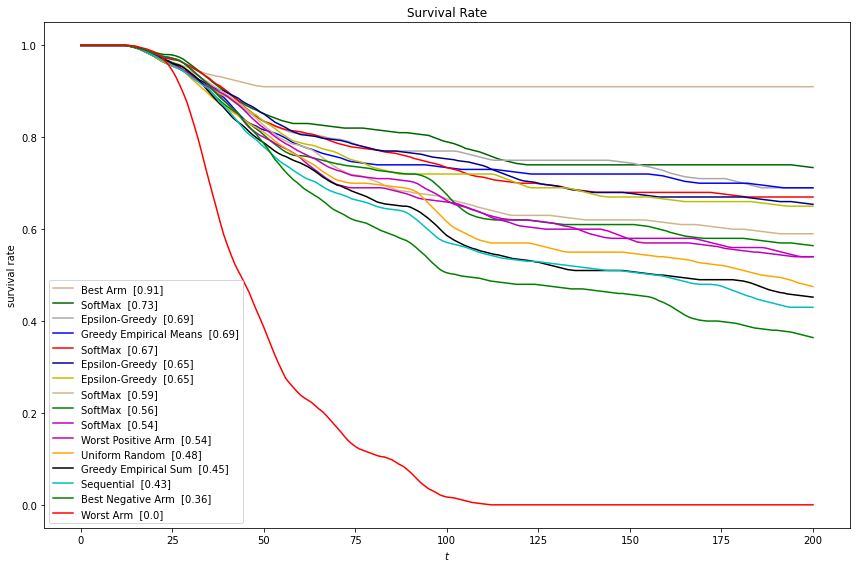

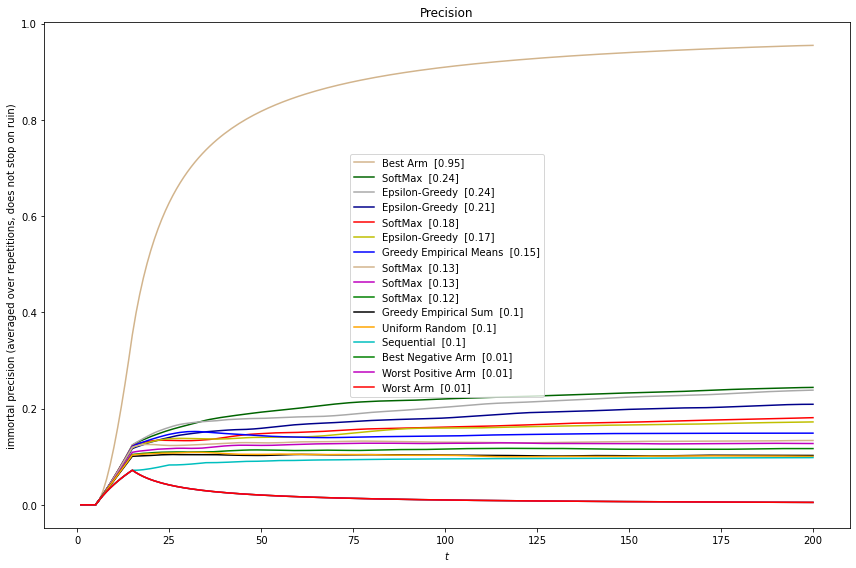

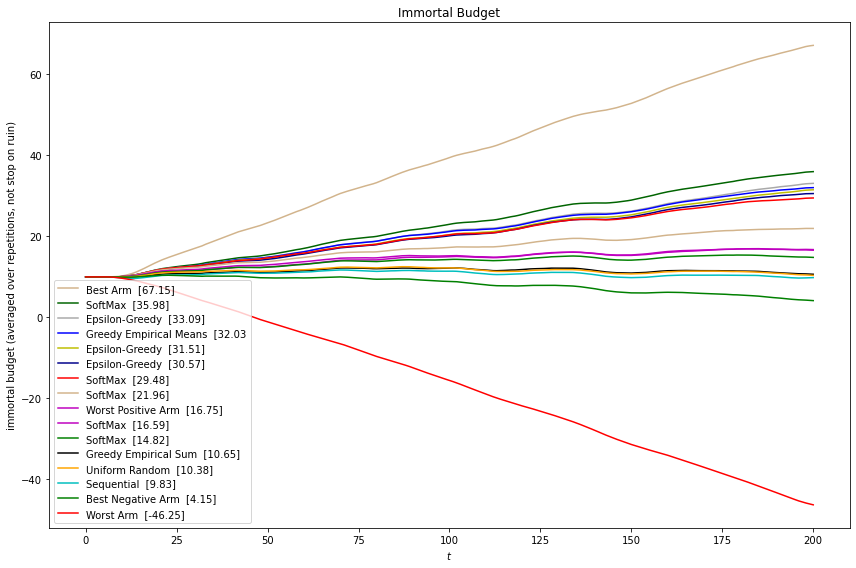

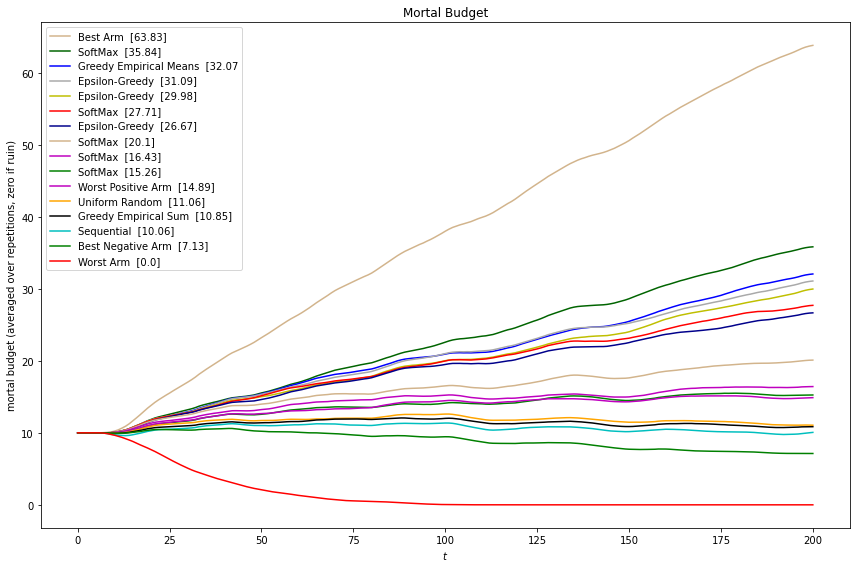

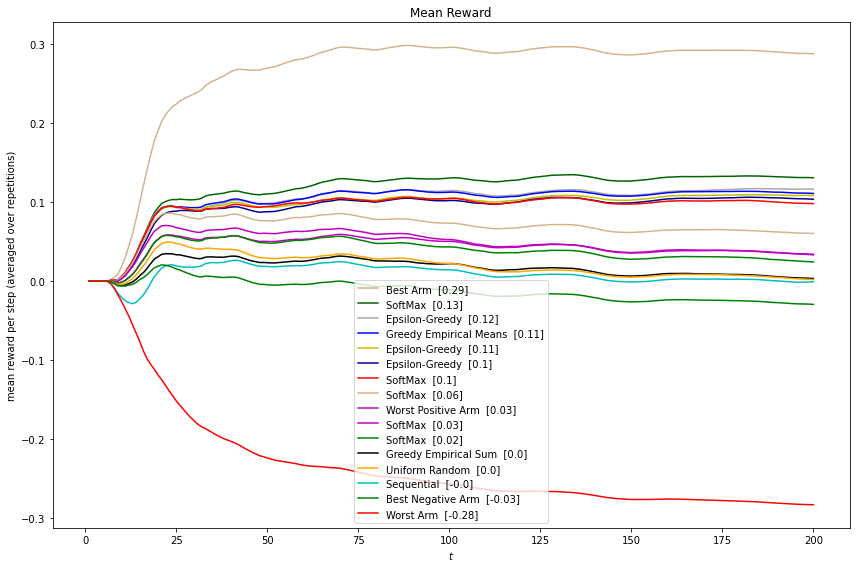

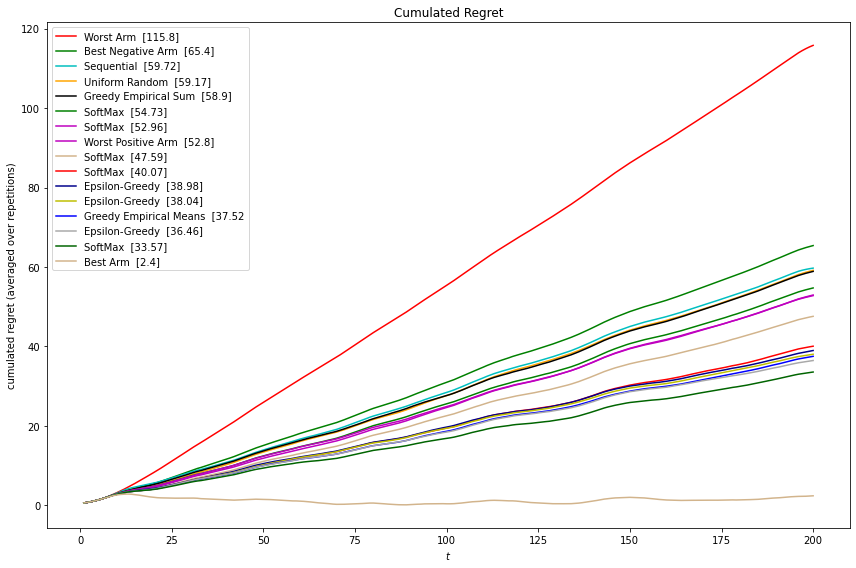

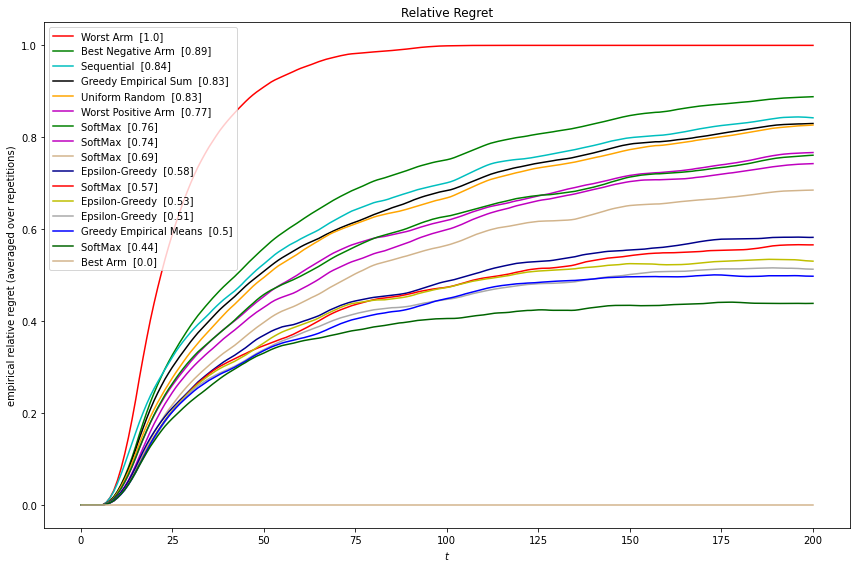

In [12]:
colors = ['r', 'tan', 'm', 'g', 'orange', 'c',  'b', 'k',  'y', 'darkgrey', 'darkblue', 'darkgreen']
styles = ['-',               '--',                '-',      '--', '-',     '--',       '-',           '--',           '-',                 ':', '-.', ':', '-']
figsize=(12,8)
smooth_window = sim_gaussian_short_simple.k

sim_gaussian_short_simple.plot('survival', filename='survival.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_simple.plot('precision', filename='precision.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_simple.plot('immortal_budget', filename='immortal_budget.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_simple.plot('mortal_budget', filename='mortal_budget.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_simple.plot('avg_reward', filename='avg_reward.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_simple.plot('sum_regret', filename='sum_regret.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_simple.plot('rel_regret', filename='rel_regret.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)


In [12]:
#algorithms
algs = [
     FixedPolicy(k, w=w, b_0=b_0, fixed_i=1, label="Worst Arm"),
     FixedPolicy(k, w=w, b_0=b_0, fixed_i=k, label="Best Arm"),
     FixedPolicy(k, w=w, b_0=b_0, fixed_i=((k+1)//2)+1, label="Worst Positive Arm"),
     FixedPolicy(k, w=w, b_0=b_0, fixed_i=((k-1)//2)+1, label="Best Negative Arm"),
     RandomPolicy(k, w=w, b_0=b_0),
     GreedyPolicy(k, w=w, b_0=b_0),
     EmpiricalSumPolicy(k, w=w, b_0=b_0),
     EpsilonGreedyPolicy(k, w=w, eps=0.05, b_0=b_0), 
     EpsilonGreedyPolicy(k, w=w, eps=0.1, b_0=b_0), 
     EpsilonGreedyPolicy(k, w=w, eps=0.2, b_0=b_0),
     #ExploreThenExploitPolicy(k, w=w, eps=0.05),
     #ExploreThenExploitPolicy(k, w=w, eps=0.1),
     #ExploreThenExploitPolicy(k, w=w, eps=0.2),
     RandomPolicy(k, w=w, b_0=b_0, omega=omega),
     EpsilonGreedyPolicy(k, w=w, eps=0.05, b_0=b_0, omega=omega),
     EpsilonGreedyPolicy(k, w=w, eps=0.1, b_0=b_0, omega=omega),
     EpsilonGreedyPolicy(k, w=w, eps=0.2, b_0=b_0, omega=omega),
     SoftMaxPolicy(k, w=w, eta=0.1, b_0=b_0),
     SoftMaxPolicy(k, w=w, eta=0.2, b_0=b_0),
     SoftMaxPolicy(k, w=w, eta=0.5, b_0=b_0),
     SoftMaxPolicy(k, w=w, eta=0.1, b_0=b_0, omega=omega),
     SoftMaxPolicy(k, w=w, eta=0.2, b_0=b_0, omega=omega),
     SoftMaxPolicy(k, w=w, eta=0.5, b_0=b_0, omega=omega),
#     BernKLUCBPolicy(k, w=w, label="KL-UCB"),
#     #AlarmedBernKLUCBPolicy(k, w=w, d=d, b_0=b_0, omega=omega, label="ST-KL-UCB"),
#     #UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
#     #UCB1Policy(k, w=w, label="UCB"),
#     AlphaUCBPolicy(k, w=w, alpha=6.0),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=4.0),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=2.0),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=1.0),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=0.5),
#     AlphaUCBPolicy(k, w=w, alpha=0.1),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=4.0, omega=omega),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=2.0, omega=omega),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=1.0, omega=omega),
     AlphaUCBPolicy(k, w=w, b_0=b_0, alpha=0.5, omega=omega),
#     MaRaBPolicy(k, w=w, label="MaRaB"),
     #UCBV(k, w=w, lower=lower, amplitude=ampl),
     ThompsonPolicy(k, w=w, b_0=b_0),
     ThompsonPolicy(k, w=w, b_0=b_0, omega=omega),
#     BayesUCBPolicy(k, w=w, label="Bayes-UCB"),
     #BanditGamblerPolicy(k, w=w, d=d, b_0=b_0, label="Gambler-Bayes"),  
     #BanditGamblerUCBPolicy(k, w=w, d=d, b_0=b_0, label="Gambler-Bayes-UCB"), 
     #PositiveGamblerUCB(k, w=w, d=d, b_0=b_0, label="Gambler-Positive")
     #BayesUCBGamblerPolicy(k, w=w, d=d, b_0=b_0, label="Bayes-UCB-Gambler"),
    ]

In [13]:
#time-horizon
h = 250

#repetitions
n = 200

sim_gaussian_short_more = SMAB(arms, algs, h, b_0, n=n, use_multiprocess=True)
sim_gaussian_short_more.run(tqdm_leave=True)


  0%|          | 0/200 [00:00<?, ?it/s]

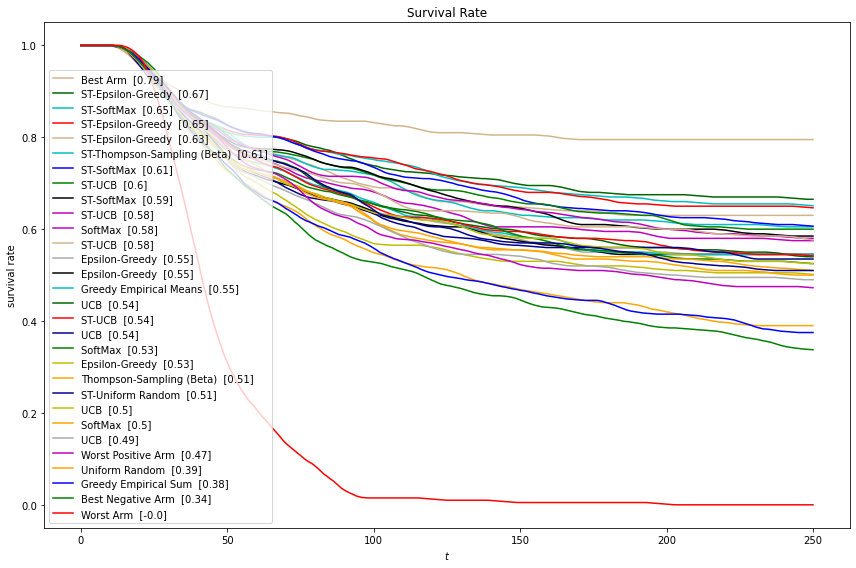

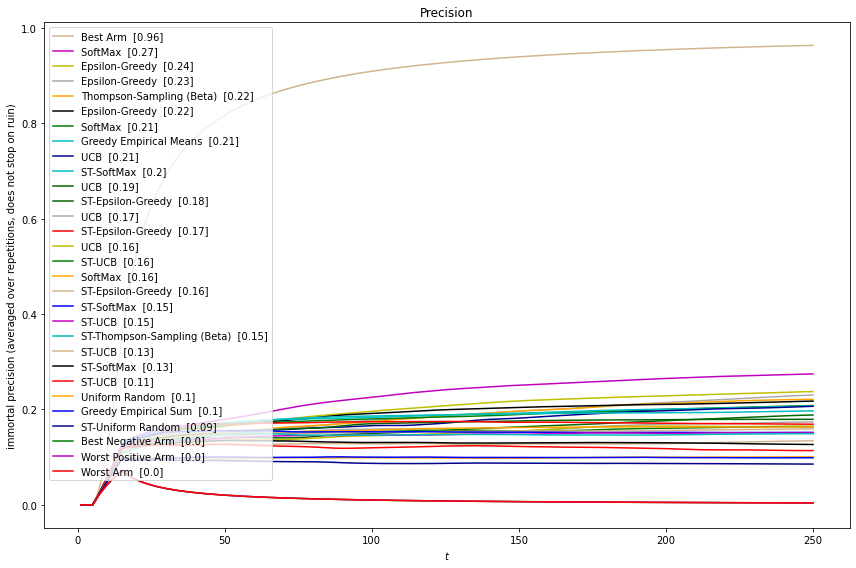

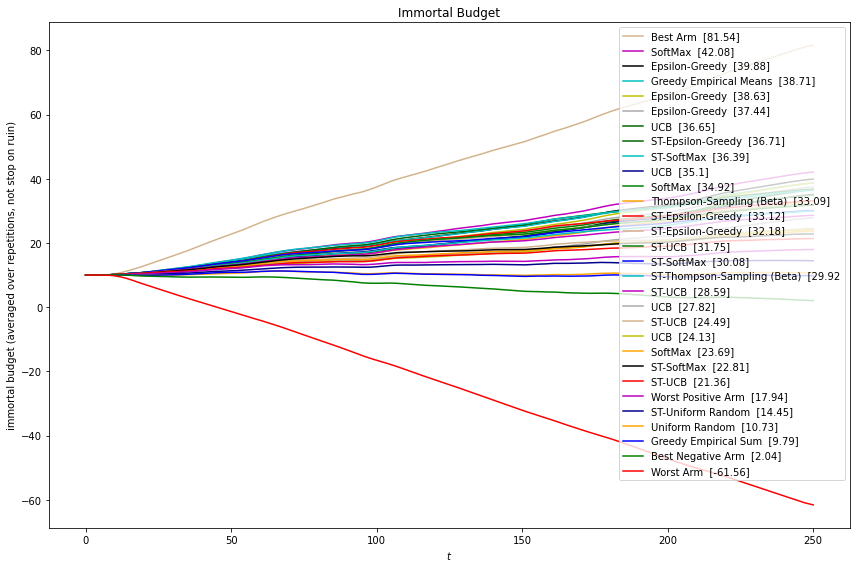

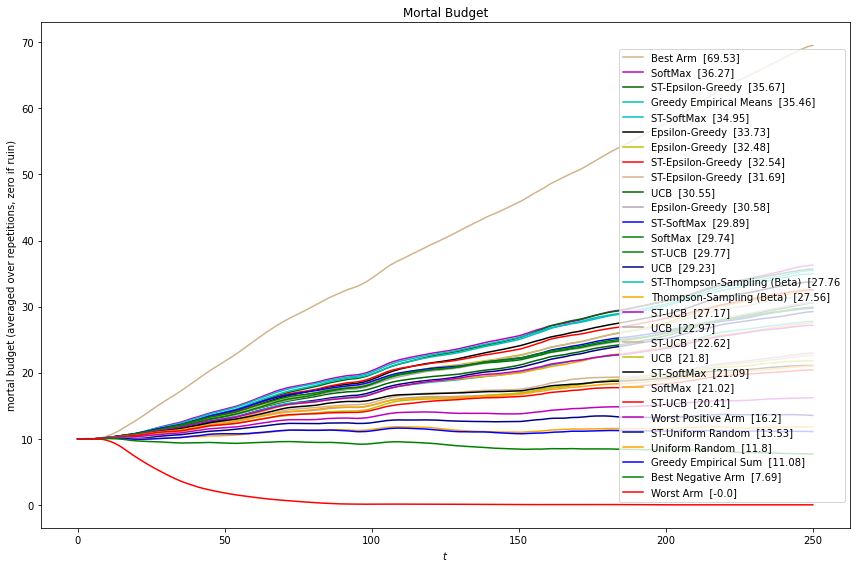

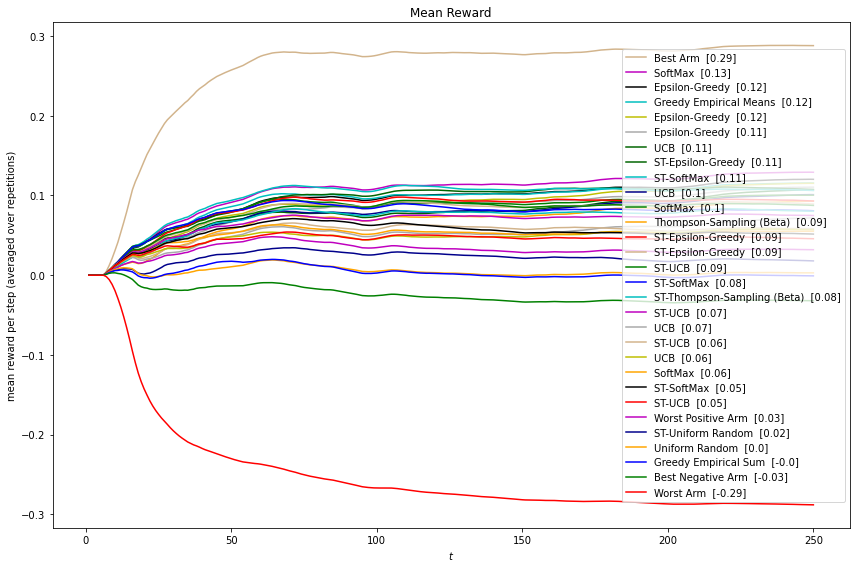

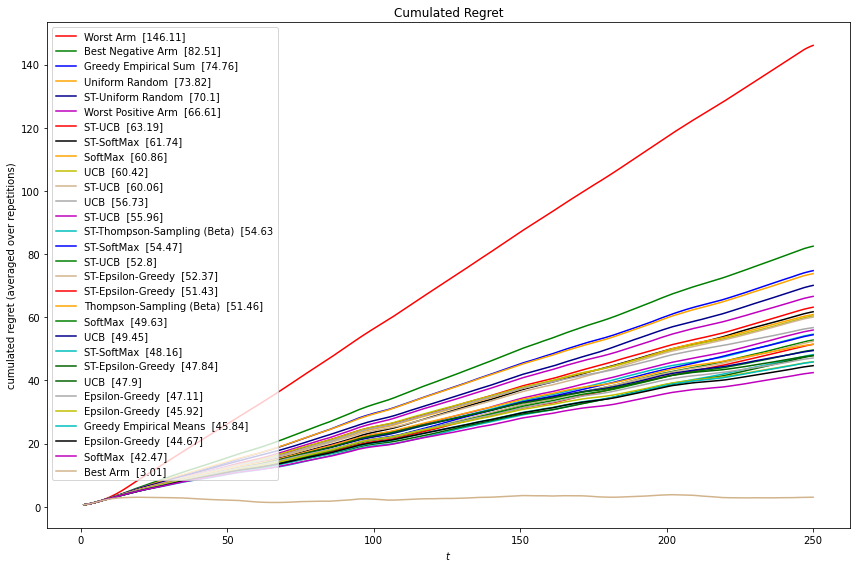

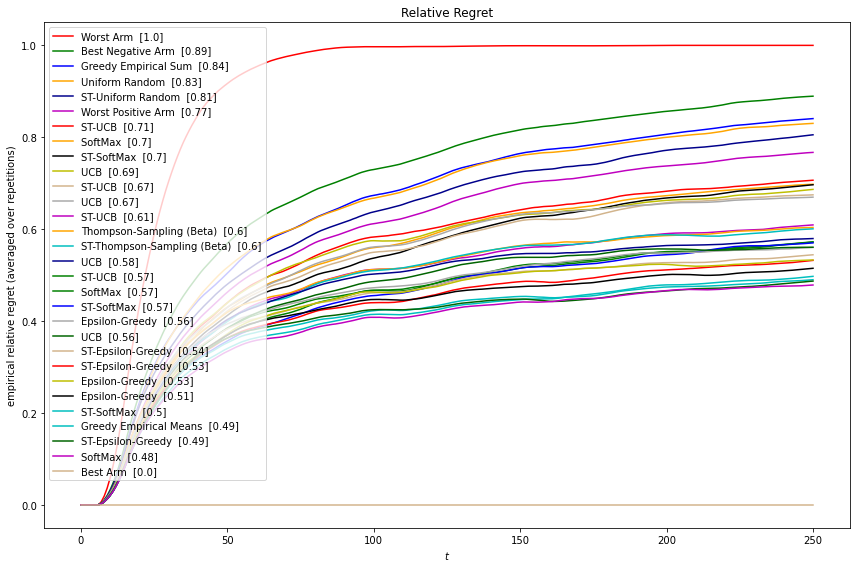

In [14]:
colors = ['r', 'tan', 'm', 'g', 'orange', 'c',  'b', 'k',  'y', 'darkgrey', 'darkblue', 'darkgreen']
styles = ['-',               '--',                '-',      '--', '-',     '--',       '-',           '--',           '-',                 ':', '-.', ':', '-']
figsize=(12,8)
smooth_window = sim_gaussian_short_more.k

sim_gaussian_short_more.plot('survival', filename='survival.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_more.plot('precision', filename='precision.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_more.plot('immortal_budget', filename='immortal_budget.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_more.plot('mortal_budget', filename='mortal_budget.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_more.plot('avg_reward', filename='avg_reward.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_more.plot('sum_regret', filename='sum_regret.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)
sim_gaussian_short_more.plot('rel_regret', filename='rel_regret.pdf', figsize=figsize, linecolors=colors, smooth_window=smooth_window)


In [11]:
#T = [49,99,149,199]
T = [49,299,499]

print('immortal precision (averaged over repetitions, does not stop on ruin)')
Y = sim_gaussian_short.MF_a[:,sim_gaussian_short.i_star]
df = pd.DataFrame(([Y[:,t] for t in T]), index=T, columns= [g.label for g in sim_gaussian_short.G]).T
df = df.sort_values(by=T[::-1], ascending=False)
df = df.round(2)
display(df)

print('mortal budget (averaged over repetitions, zero if ruin)')
Y = sim_gaussian_short.MRB
df = pd.DataFrame(([Y[:,t] for t in T]), index=T, columns= [g.label for g in sim_gaussian_short.G]).T
df = df.sort_values(by=T[::-1], ascending=False)
df = df.round(2)
display(df)

print('survival rate')
Y = sim_gaussian_short.MS
df = pd.DataFrame(([Y[:,t] for t in T]), index=T, columns= [g.label for g in sim_gaussian_short.G]).T
df = df.sort_values(by=T[::-1], ascending=False)
df = df.round(2)
display(df)



immortal precision (averaged over repetitions, does not stop on ruin)


NameError: name 'sim_gaussian_short' is not defined

## Simulation Gaussian : long-horizon

 - Few Repetitions 
 - Long Horizon

In [5]:
#time-horizon
h = 500

#repetitions
n = 10

sim_gaussian_long = SMAB(arms, algs, h, b_0, n=n)
sim_gaussian_long.run(tqdm_leave=True, prev_draw=True)



TypeError: run() got an unexpected keyword argument 'prev_draw'

In [ ]:
colors = ['r', 'tan', 'm', 'g', 'orange', 'c',  'b', 'k',  'y', 'darkgrey', 'darkblue', 'darkgreen']
figsize=(12,8)

sim_gaussian_long.plot('survival', filename='survival.pdf', figsize=figsize, linecolors=colors)
sim_gaussian_long.plot('precision', filename='precision.pdf', figsize=figsize, linecolors=colors)
sim_gaussian_long.plot('immortal_budget', filename='immortal_budget.pdf', figsize=figsize, linecolors=colors)
sim_gaussian_long.plot('mortal_budget', filename='mortal_budget.pdf', figsize=figsize, linecolors=colors)
sim_gaussian_long.plot('avg_reward', filename='avg_reward.pdf', figsize=figsize, linecolors=colors)
sim_gaussian_long.plot('sum_regret', filename='sum_regret.pdf', figsize=figsize, linecolors=colors)
sim_gaussian_long.plot('rel_regret', filename='sum_regret.pdf', figsize=figsize, linecolors=colors)



## Setting (k-ExtBernoulli-Arms)

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

#number of arms and corresponding parameters
k = 10
p_arr = np.linspace(0.4, 0.6, k)

#BERNOULLI
arms = [BernoulliArm(p) for p in p_arr]

#initial budget
b_0 = k #15
omega = k #5

#domain support for rewards
d = Domain(r_min=-1.0, r_max=+1.0)

#each arm must be tried at least w times at beginning
w=1

#algorithms
algs = [
     FixedPolicy(k, w=w, fixed_i=0, label="Worst Arm"),
     FixedPolicy(k, w=w, fixed_i=k-1, label="Best Arm"),
     FixedPolicy(k, w=w, fixed_i=(k+1)//2, label="Worst Positive Arm"),
     FixedPolicy(k, w=w, fixed_i=(k-1)//2, label="Best Negative Arm"),
     RandomPolicy(k, w=w, label="Random Arm"),
     EmpiricalMeansPolicy(k, w=w, label="Empirical Means"),
     EmpiricalSumPolicy(k, w=w, label="Empirical Sum"),
     EpsilonGreedyPolicy(k, w=w, eps=0.1, label="Epsilon-Greedy (0.1)"), 
     #AlarmedEpsilonGreedyPolicy(k, w=w, eps=0.1, d=d, b_0=b_0, omega=omega),
     #SoftMaxPolicy(k, w=w),
     BernKLUCBPolicy(k, w=w, label="KL-UCB"),
     #AlarmedBernKLUCBPolicy(k, w=w, d=d, b_0=b_0, omega=omega, label="ST-KL-UCB"),
     #UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     UCB1Policy(k, w=w, label="UCB"),
     #AlarmedUCBPolicy(k, w=w, d=d, b_0=b_0, omega=omega, label="ST-UCB"),
     #MaRaBPolicy(k, w=w, label="MaRaB"),
     #UCBV(k, w=w, lower=lower, amplitude=ampl),
     ThompsonPolicy(k, w=w, label="Thompson Sampling"),
     BayesUCBPolicy(k, w=w, label="Bayes-UCB"),
     #BanditGamblerPolicy(k, w=w, d=d, b_0=b_0, label="Gambler-Bayes"),  
     #BanditGamblerUCBPolicy(k, w=w, d=d, b_0=b_0, label="Gambler-Bayes-UCB"), 
     #PositiveGamblerUCB(k, w=w, d=d, b_0=b_0, label="Gambler-Positive")
     #BayesUCBGamblerPolicy(k, w=w, d=d, b_0=b_0, label="Bayes-UCB-Gambler"),
    ]

crits = [
    "Survival Episodes Rate", 
    "Survival Time (before ruin or end) (averaged over episodes)", 
    "Survival Time (std dev)", 
    "Cumulative Time on Negative Budget (averaged over episodes)", 
    "Cumulative Time on Negative Budget (std dev)", 
    "Cumulative Negative Budget (averaged over episodes)",
    "Cumulative Negative Budget (std dev)",
    "Cumulative Regret (averaged over episodes)",
    "Cumulative Regret (std dev)"
    ]
labels = ["Worst", "Oracle", "Random", "Empirical-Means", "$\epsilon$-Greedy 01", "$\epsilon$-Greedy 09", "ST-Eps", "SoftMax", "KL-UCB", "ST-KL-UCB", "UCB", "ST-UCB", "MaRaB", "Thompson", "Bayes-UCB", "Bayes-Gambler", "Bayes-UCB-Gambler"]
#labels = ["Empirical-Means", "$\epsilon$-Greedy", "KL-UCB", "UCB", "MaRaB", "Thompson", "Bayes-UCB", "Bayes-Gambler", "Bayes-UCB-Gambler"]
colors = ['r',               'tan',               'm',      'g',   'orange', 'c',        'b',         'k',            'k',                 'c', 'tan', 'pink', 'k', 'm']
styles = ['-',               '--',                '-',      '--', '-',     '--',       '-',           '--',           '-',                 ':', '-.', ':', '-']

#print(p_arr)
plt.ylim=(0.0, 1.0)
plt.bar(range(k), p_arr)
for i,p in enumerate(p_arr):
    plt.text(x=i-0.4, y=p+0.01, s=f"{p:0.2}")
plt.xlabel('$i$ (arm)')
plt.ylabel('$p$ (probability of success)')
plt.show()

def ruin_factor(p, b):
    return ((1-p)/p)**b

def ruin_prob(p, b):
    return ruin_factor(p, b) if p > 0.5 else 1.0

def surv_prob(p, b):
    return 1-ruin_prob(p, b)

def ruin_estimated_prob(p, x, y, b):
    return beta.cdf(0.5, x+1, y+1) + integral(lambda p, x, y, b : ((1-p)/p)**b * beta.pdf(p, x+1, y+1), 0.5, 1.0, (x, y, b))[0]

def surv_estimated_prob(p, x, y, b):
    b = max(1.0, self.b)
    return integral(lambda p, x, y, b : (1-((1-p)/p)**b) * beta.pdf(p, x+1, y+1), 0.5, 1.0, (x, y, b))[0]

print("Probability of surviving over infinite horizon, given arm and budget:") 
df = pd.DataFrame(([round(p, 3), round(surv_prob(p, b_0), 3)] for p in p_arr), columns = ["p", "w"])
display(df)

## Simulation Bernoulli : short-horizon

 - Several Repetitions 
 - Short Horizon

In [ ]:
#time-horizon
h = 500

#repetitions
n = 15

M1 = SMAB(arms, algs, h, b_0, d=d, n=n)
M1.run(tqdm_leave=True)



In [ ]:
#T = [49,99,149,199]
T = [49,299,499]

print('immortal precision (averaged over repetitions, does not stop on ruin)')
Y = M1.MF_a[:,M1.i_star]
df = pd.DataFrame(([Y[:,t] for t in T]), index=T, columns= [g.label for g in M1.G]).T
df = df.sort_values(by=T[::-1], ascending=False)
df = df.round(2)
display(df)

print('mortal budget (averaged over repetitions, zero if ruin)')
Y = M1.MRB
df = pd.DataFrame(([Y[:,t] for t in T]), index=T, columns= [g.label for g in M1.G]).T
df = df.sort_values(by=T[::-1], ascending=False)
df = df.round(2)
display(df)

print('survival rate')
Y = M1.MS
df = pd.DataFrame(([Y[:,t] for t in T]), index=T, columns= [g.label for g in M1.G]).T
df = df.sort_values(by=T[::-1], ascending=False)
df = df.round(2)
display(df)



In [ ]:
colors = ['r', 'tan', 'm', 'g', 'orange', 'c',  'b', 'k',  'y', 'darkgrey', 'darkblue', 'darkgreen']
styles = ['-', '--',  '-', '--', '-',     '--', '-', '--',  '-',    ':', '-.', ':', '-']

M1.plot('survival', filename='survival.pdf', figsize=(8,5), linecolors=colors)
M1.plot('precision', filename='precision.pdf', figsize=(8,5), linecolors=colors)
M1.plot('immortal_budget', filename='immortal_budget.pdf', figsize=(8,5), linecolors=colors)
M1.plot('mortal_budget', filename='mortal_budget.pdf', figsize=(8,5), linecolors=colors)
M1.plot('avg_reward', filename='avg_reward.pdf', figsize=(8,5), linecolors=colors)
M1.plot('sum_regret', filename='sum_regret.pdf', figsize=(8,5), linecolors=colors)

X = M1.T01
Z = np.reshape(np.repeat(0, M1.m), [M1.m, 1])
Y = np.block([Z, 1-M1.MRB/M1.MRB[1,:]])
M1.plot(Y, X=X, filename='relative_regret.pdf', figsize=(8,5), ylabel = 'relative regret (averaged over repetitions, 1 if ruin)', title="Empirical Relative Regret")
                

#import tikzplotlib
#tikzplotlib.save("test.tex")  #before show

if (export_files_from_colab):
    files.download('survival.pdf')
    files.download('precision.pdf')
    files.download('immortal_budget.pdf')
    files.download('mortal_budget.pdf')
    files.download('sum_regret.pdf')
    files.download('avg_regret.pdf')
    files.download('relative_regret.pdf')



## Simulation Bernoulli : long-horizon

 - Few Repetitions 
 - Long Horizon

In [ ]:
#time-horizon
h = 10000 
 
#repetitions
n = 100 #100

M2 = SMAB(arms, algs, h, d=d, n=n, b_0=b_0)
M2.run(tqdm_leave=True)

In [ ]:
M2.plot('survival')
M2.plot('precision')
M2.plot('sum_reward')
M2.plot('immortal_budget')
M2.plot('mortal_budget')
M2.plot('penalized_budget')
M2.plot('avg_reward')
M2.plot('sum_regret')
M2.plot('avg_regret')

if (export_files_from_colab):
  #files.download(date + '_survival_progression_h' + str(h) + '.pdf')
  pass


In [ ]:
EXTRAS:

#parameters
import_smab_from_localfolder = True
import_smab_from_github = False
export_files_from_colab = False

#verify if notebook is running from google colab
COLAB = 'google.colab' in sys.modules

#This option allows to export the graphics resulting from simulations when running on google colab
if COLAB and export_files_from_colab:
    from google.colab import files

#install
#!pip install -q ray

#smab packages locally
if (import_smab_from_localfolder):
    import sys
    sys.path.append('../smab')

#smab packages on github
if (import_smab_from_github):
    !pip install git+https://github.com/fsperotto/smab.git

#from smab import Domain, RandomArm, BernoulliArm
#from smab import BasePolicy, RandomPolicy, FixedPolicy, EmpiricalMeansPolicy, EmpiricalSumPolicy, EpsilonGreedyPolicy, SoftMaxPolicy, UCB1Policy, BernKLUCBPolicy, ThompsonPolicy, BayesUCBPolicy, MaRaBPolicy
#from smab import BanditGamblerPolicy, BanditGamblerUCBPolicy, AlarmedUCBPolicy, AlarmedBernKLUCBPolicy, AlarmedEpsilonGreedyPolicy, PositiveGamblerUCB
#from smab import SMAB

if (export_files_from_colab):
    files.download('survival.pdf')
    files.download('precision.pdf')
    files.download('immortal_budget.pdf')
    files.download('mortal_budget.pdf')
    files.download('sum_regret.pdf')
    files.download('avg_regret.pdf')
    files.download('relative_regret.pdf')
